In [826]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [827]:
def plot_p1(v):
	'''
	Plots 2d v array for problem 1
	'''
	m, n = v.shape
	#note: swap positions of elements in v so that the triangle
	#is in the bottom left and +x/+y are in the right/up direction
	v = np.flipud(np.fliplr(v))
	x = np.linspace(0,1,m)
	y = np.linspace(0,1,n)
	plt.contourf(x, y, v)
	plt.show()


In [828]:
def plot_p2(x, t, u):
	'''
	Plots 2d u array for problem 2
	'''

	X,T = np.meshgrid(x,t)
	fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
	surf = ax.plot_surface(X, T, u, cmap=cm.coolwarm, linewidth=0, antialiased=False)

	ax.set_zlim(-1.01, 1.01)
	ax.zaxis.set_major_formatter('{x:.02f}')
	fig.colorbar(surf, shrink=0.5, aspect=5)
	plt.show()

In [829]:
def initialize_1(u, h):
    # Set boundary conditions along the edges

    for i in range(u.shape[0]):
        u[i, 0] = (h*i)**2
    for j in range(u.shape[1]):
        u[0, j] = h*j
    # Set boundary condition on hypotenuse
    for i in range(1, u.shape[0]-1):
        u[i, u.shape[1]-i-1] = 1.0
#     for i in range(1,u.shape[0]-1):
#         for j in range(1,u.shape[1]-i):
#             u[i,j]=0
#     print(u)
    return u
# def initialize_1(u, h):
#     '''
#     Initialize an array to account for BCs and geometry for problem 1.
#     Args:
#         u: 2D numpy array corresponding to values sampled on a regular 2D grid
#         h: float grid-spacing
#     Returns:
#         2D numpy array corresponding to the input with boundary values on the boundary/exterior or the triangular domain.
#     '''
#     xn,yn = u.shape
#     u_in = np.ones([xn,yn])
#     for i in range(xn):
#         u_in[i, 0] = (i*h)**2
#     for j in range(yn):
#         u_in[0, j] = (j*h)
#     for k in range(1,xn):
#         u_in[k, yn-k] = 1
#     for i in range(1,xn-1):
#         for j in range(1,yn-i):
#             u_in[i,j]=0
# #     print(u)
#     return(u_in)


In [830]:
def update(u):
    # Make a copy of the input array
    u_new = np.copy(u)
    # Apply 5-point stencil scheme to interior points
    for i in range(1, u.shape[0]-1):
        for j in range(1, u.shape[1]-1):
            u_new[i, j] = (u[i-1, j] + u[i+1, j] + u[i, j-1] + u[i, j+1])/4.0
    return u_new

In [843]:
def iter_solve(u, tol, max_iters):
    # Set initial values and counter
    u_new =initialize_1(u, 0.05)
    iter_count = 0
#     # Iterate until convergence or maximum number of iterations reached
#     while iter_count < max_iters:
#         # Update values and calculate change
#         u_old = np.copy(u_new)
#         u_new = update(u_old)
#         change = np.max(np.abs(u_new - u_old))
#         # Check for convergence
#         if change < tol:
#             break
#         iter_count += 1
    for k in range(max_iters):
        if iter_count < max_iters:
            u_old = np.copy(u_new)
            u_new = update(u_old)
            change = np.max(np.abs(u_new - u_old))
        if change < tol:
            break
        iter_count += 1
        
    # Return final solution and number of iterations
    return u_new, iter_count

0.1
[[0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.  ]
 [0.01 0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  ]
 [0.04 0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.09 0.   0.   0.   0.   0.   0.   1.   0.   0.   0.  ]
 [0.16 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.36 0.   0.   0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.49 0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.64 0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.81 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


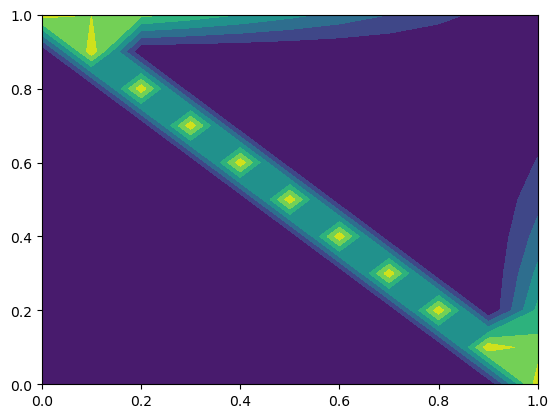

[[0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5  ]
 [0.003 0.048 0.089 0.132 0.167 0.206 0.233 0.257 0.255 0.204 0.   ]
 [0.01  0.047 0.084 0.111 0.143 0.161 0.182 0.18  0.165 0.107 0.   ]
 [0.023 0.053 0.074 0.102 0.113 0.134 0.132 0.133 0.106 0.066 0.   ]
 [0.04  0.058 0.078 0.084 0.102 0.099 0.107 0.09  0.077 0.04  0.   ]
 [0.062 0.072 0.073 0.084 0.078 0.087 0.074 0.073 0.049 0.03  0.   ]
 [0.09  0.082 0.08  0.069 0.074 0.061 0.064 0.047 0.04  0.018 0.   ]
 [0.123 0.098 0.075 0.068 0.053 0.054 0.04  0.039 0.023 0.015 0.   ]
 [0.16  0.103 0.072 0.049 0.044 0.032 0.032 0.021 0.018 0.008 0.   ]
 [0.203 0.089 0.046 0.032 0.021 0.02  0.013 0.013 0.007 0.005 0.   ]
 [0.25  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   ]]


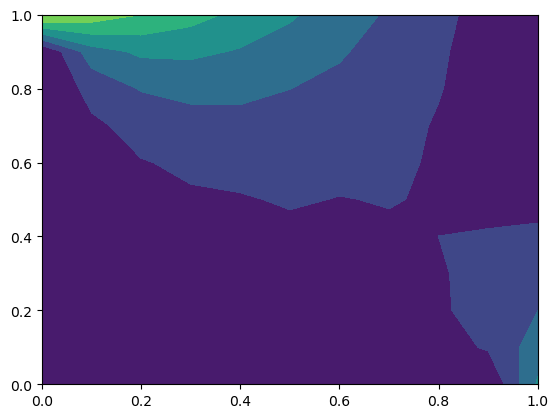

73


In [846]:

n = 11
h = 1/(n-1)

tol = 0.01
max_iters = 300

u = np.zeros([n,n])
u = initialize_1(u, h)
print(h)
print(u)
plot_p1(u)
# u1= initialize_3(u,h)
# print(u1)
# plot_p1(u1)
v, iters = iter_solve(u, tol, max_iters)
print(v)
plot_p1(v)
print(iters)
# print(u1)
# print(v)

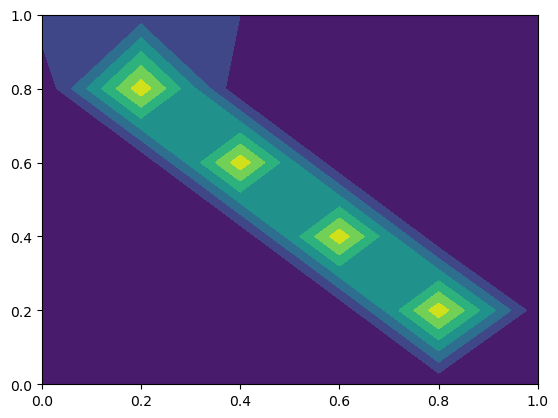

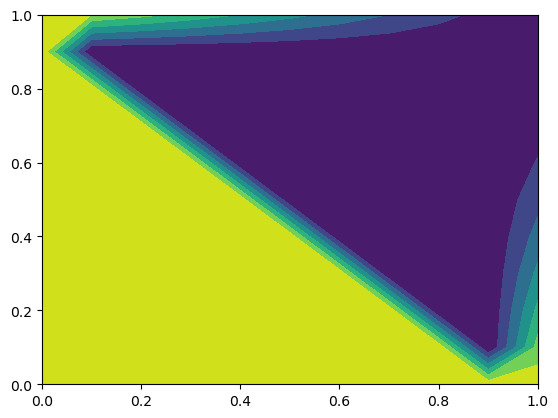

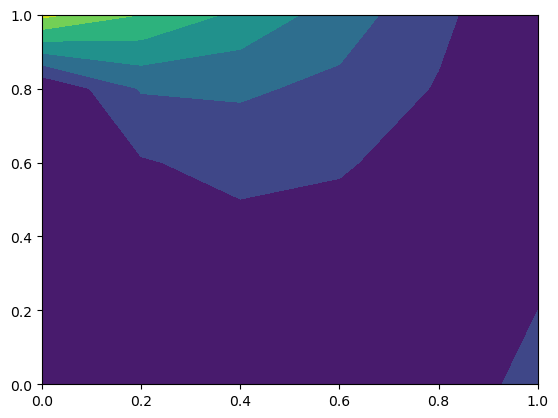

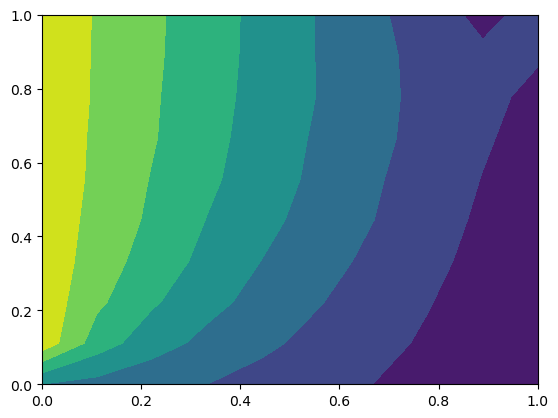

In [845]:
plot_p1(u)
plot_p1(u2)
plot_p1(v)
plot_p1(v1)

In [834]:
# Create a 2D numpy array to represent the grid
# n = 21  # number of grid points in each dimension
# u = np.zeros((n, n))

# Solve for the temperature distribution
u_soln, iters = iter_solve(u,tol,max_iters)

# Print the solution and number of iterations
print("Solution:\n", u_soln)
print("Number of iterations:", iters)

Solution:
 [[0.    0.05  0.1   0.15  0.2   0.25 ]
 [0.003 0.037 0.07  0.086 0.083 0.   ]
 [0.01  0.032 0.042 0.054 0.036 0.   ]
 [0.023 0.024 0.033 0.026 0.021 0.   ]
 [0.04  0.022 0.014 0.016 0.007 0.   ]
 [0.062 0.    0.    0.    0.    0.   ]]
Number of iterations: 21


0.2


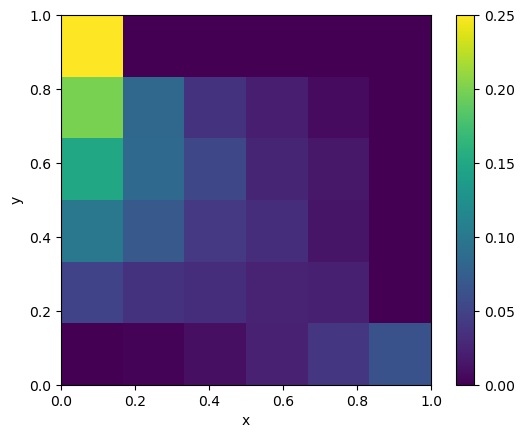

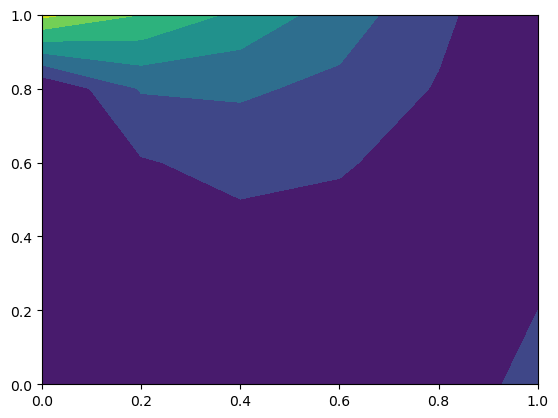

In [835]:
# Plot the solution as a color map
print(h)
plt.imshow(u_soln.T, origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plot_p1(u_soln)

In [836]:
def displacement(x):
    '''
    Initial displacement function for problem 2

    Args:
        x: 1d numpy float array of positions on uniform 1d grid
    Returns:
        1d numpy float array of displacements
    '''

    return np.maximum(0, 1 - np.abs(x/10.0))

In [837]:
def initialize_2(f, x, u):
    '''
    Set up the solution array and establish initial conditions

    Args:
        f: function that defines initial displacement
        x: 1d numpy float array of positions on uniform 1d grid
        u: nt x nx float numpy array
    Returns:
        nt x nx float numpy array with initial displacement stored for first two time steps
    '''

    u[0,:] = f(x)
    u[1,:] = u[0,:]
    print(u)
    return u

In [838]:
def single_step(x0, x1, dx, dt):
    '''
    Compute a single update step for central difference 
    discretization of wave equation.

    Args:
        x0: 1D numpy float array of previous displacements
        x1: 1D numpy float array of current displacements
        dx: float grid-spacing
        dt: float timestep
    Returns:
        x2: 1d array of updated displacements
    '''

    c = 1
    alpha = (c*dt/dx)**2
    x2 = np.zeros_like(x1)

    for i in range(1, len(x1)-1):
        x2[i] = 2*x1[i] -x0[i] + alpha*(x1[i+1] - 2*x1[i] + x1[i-1])
#     for i in range(1, len(x1)-1):
#         x2[i]= x0[i]+alpha*(-x1[i-1] + x1[i+1])
    print(x2)
    return x2

In [839]:
def step_solve(x, t, u, dx, dt):
    '''
    Compute the solution array for problem 2

    Args:
        x: 1d numpy float array of positions on uniform 1d grid
        t: 1d numpy float array of time steps on uniform 1d grid
        u: nt x nx float numpy array
        dx: float grid-spacing
        dt: float timestep
    Retuns:
        2D float numpy array of computed solution values

    '''

    for n in range(1, len(t)-1):
        u[n+1,:] = single_step(u[n-1,:], u[n,:], dx,dt)
    return u

len(t),len(x),(u.shape),dt
86 50 (86, 50) 0.40775510204081633


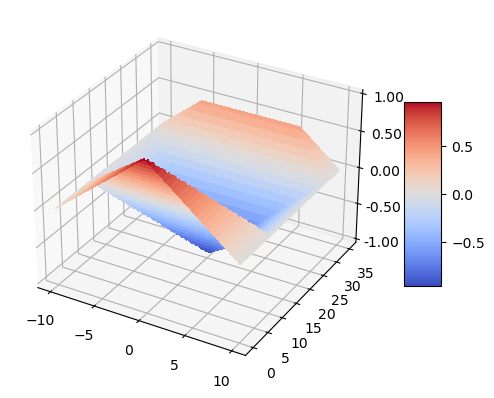

len(t),len(x),(u.shape),dt
86 50 (86, 50) 0.40857142857142853


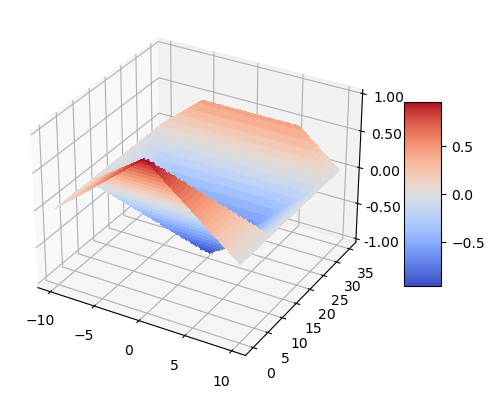

In [842]:
xmin = -10
xmax = 10
nx = 50
dx = (xmax - xmin)/(nx - 1)

tmin = 0.0
tmax = 35.0

for s in [0.999,1.001]:
    dt = s*dx
    nt = int((tmax - tmin)//dt) + 1

    x = np.linspace(xmin,xmax,nx)
    t = np.linspace(tmin,tmax,nt)
    u = np.zeros((nt,nx))
    print("len(t),len(x),(u.shape),dt")
    print(len(t),len(x),u.shape,dt)

    u = initialize_2(displacement,x,u)
    u = step_solve(x,t,u,dx,dt)
    plot_p2(x,t,u)